<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/toxicity_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/ggl9krhh6dcwhhz/train.csv

--2020-03-25 19:09:11--  https://www.dropbox.com/s/ggl9krhh6dcwhhz/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ggl9krhh6dcwhhz/train.csv [following]
--2020-03-25 19:09:17--  https://www.dropbox.com/s/raw/ggl9krhh6dcwhhz/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd2ff4d46b45e7ce8434c4fa0ee.dl.dropboxusercontent.com/cd/0/inline/A0nxncMvg-hu4Lu54UoL3lWxlDt5qwqOn_uQw87-UTDTPNj3I8tO6ReSo3Q7Wig2nticWCl3wJScd6SFSphvAaOImXDbK3AjBwDVy7u_VYJnqw/file# [following]
--2020-03-25 19:09:17--  https://ucd2ff4d46b45e7ce8434c4fa0ee.dl.dropboxusercontent.com/cd/0/inline/A0nxncMvg-hu4Lu54UoL3lWxlDt5qwqOn_uQw87-UTDTPNj3I8tO6ReSo3Q7Wig2nticWCl3wJScd6SFSphvAaOImXDbK3AjBwDVy7u_VYJnqw/file
Resolving ucd2ff4d46b45e7

In [1]:
!wget https://www.dropbox.com/s/ggl9krhh6dcwhhz/test.csv

--2020-03-25 19:17:25--  https://www.dropbox.com/s/ggl9krhh6dcwhhz/test.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ggl9krhh6dcwhhz/test.csv [following]
--2020-03-25 19:17:25--  https://www.dropbox.com/s/raw/ggl9krhh6dcwhhz/test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd2ff4d46b45e7ce8434c4fa0ee.dl.dropboxusercontent.com/cd/0/inline/A0nxncMvg-hu4Lu54UoL3lWxlDt5qwqOn_uQw87-UTDTPNj3I8tO6ReSo3Q7Wig2nticWCl3wJScd6SFSphvAaOImXDbK3AjBwDVy7u_VYJnqw/file# [following]
--2020-03-25 19:17:26--  https://ucd2ff4d46b45e7ce8434c4fa0ee.dl.dropboxusercontent.com/cd/0/inline/A0nxncMvg-hu4Lu54UoL3lWxlDt5qwqOn_uQw87-UTDTPNj3I8tO6ReSo3Q7Wig2nticWCl3wJScd6SFSphvAaOImXDbK3AjBwDVy7u_VYJnqw/file
Resolving ucd2ff4d46b45e7ce8

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [4]:
train_data.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


In [0]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from IPython.core.display import display, HTML
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Conv1D, Input, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPooling1D,MaxPooling1D
from keras.models import Model,Sequential
from keras import initializers, regularizers, constraints, optimizers, layers

In [7]:
list_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

y_train = train_data[list_classes].values
print(y_train.shape)
x_train = train_data['comment_text']
x_test  = test_data['comment_text']


(159571, 6)


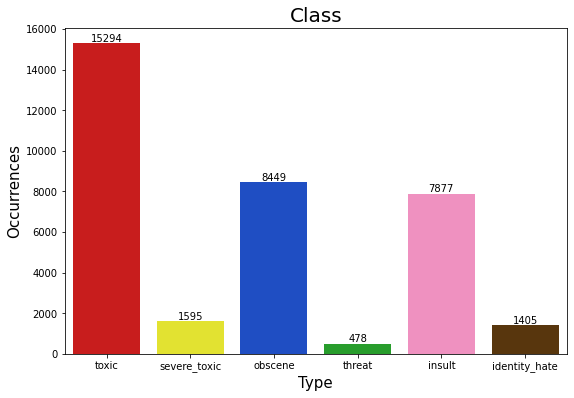

None

In [8]:
colors = ["red", "yellow", "blue","green", "pink", "brown", "black"]

palette= sns.xkcd_palette(colors)

x=train_data[list_classes].sum()
plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class",fontsize=20)
plt.ylabel('Occurrences', fontsize=15)
plt.xlabel('Type',fontsize=15)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, ha='center', va='bottom')

display(plt.show())

In [9]:
for i in range(5):
  print(x_train[i])
  print(y_train[i])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
[0 0 0 0 0 0]
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
[0 0 0 0 0 0]
Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
[0 0 0 0 0 0]
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences f

# **Prepocessing the data**

In [10]:
#we need to vectorize our text corpus
#Declaring the tokenizer
tokenizer=Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

#fitting the tokenizer and then running it on the train and test features
tokenizer.fit_on_texts(list(x_train))
tokenized_train = tokenizer.texts_to_sequences(x_train)
tokenized_test = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index

#extracting the variables
vocab_size = len(word_index)
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in tokenized_train)
print("Longest comment size: {}".format(longest))
mean = np.mean([len(seq) for seq in tokenized_train])
print("Mean comment size: {}".format(mean))
stdev = np.std([len(seq) for seq in tokenized_train])
print("Standard Deviation of comment size: {}".format(stdev))
max_len = int(mean + stdev * 3)
print('Max comment size: {}'.format(max_len))
print()

#padding the sequences
processed_X_train = pad_sequences(tokenized_train, maxlen=max_len, padding='post', truncating='post')
processed_X_test = pad_sequences(tokenized_test, maxlen=max_len, padding='post', truncating='post')


processed_X_train.shape

Vocab size: 210337
Longest comment size: 1403
Mean comment size: 68.22156908210138
Standard Deviation of comment size: 101.07344657013672
Max comment size: 371



(159571, 371)

In [11]:
for i, (sent, token) in enumerate(zip(x_train[:5], tokenized_train[:5])):
    print('Sequence {}'.format(i+1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token))

Sequence 1
  Input:  Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
  Output: [688, 75, 1, 126, 130, 177, 29, 672, 4511, 12052, 1116, 86, 331, 51, 2278, 11448, 50, 6864, 15, 60, 2756, 148, 7, 2937, 34, 117, 1221, 15190, 2825, 4, 45, 59, 244, 1, 365, 31, 1, 38, 27, 143, 73, 3462, 89, 3085, 4583, 2273, 985]
Sequence 2
  Input:  D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
  Output: [96145, 52, 2635, 13, 555, 3809, 73, 4556, 2706, 21, 94, 38, 803, 2679, 992, 589, 8377, 182]
Sequence 3
  Input:  Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than 

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
y_train.shape

(159571, 6)

In [14]:
dim=300
ei={}
file=open('/content/drive/My Drive/glove300d.txt',encoding='utf-8')
for line in file:
  vals=line.rstrip().rsplit(' ',dim)
  word = vals[0]
  coefs = np.asarray(vals[1:], dtype='float32')
  ei[word] = coefs
file.close()
print('Found {} word vectors.'.format(len(ei)))

Found 400000 word vectors.


In [15]:
ei['good']

array([-1.3602e-01, -1.1594e-01, -1.7078e-02, -2.9256e-01,  1.6149e-02,
        8.6472e-02,  1.5759e-03,  3.4395e-01,  2.1661e-01, -2.1366e+00,
        3.5278e-01, -2.3909e-01, -2.2174e-01,  3.6413e-01, -4.5021e-01,
        1.2104e-01, -1.5596e-01, -3.8906e-02, -2.9419e-03,  1.6009e-02,
       -1.1620e-01,  3.8680e-01,  3.5109e-01,  9.7426e-02, -1.2425e-02,
       -1.7864e-01, -2.3259e-01, -2.6960e-01,  4.1083e-02, -7.6194e-02,
       -2.3362e-01,  2.0919e-01, -2.7264e-01,  5.4967e-02, -1.8055e+00,
        5.6348e-01, -1.2778e-01,  2.3147e-01, -5.8820e-03, -2.6630e-01,
        4.1187e-01, -3.7162e-01, -2.0600e-01, -1.9619e-01, -4.3945e-03,
        1.2513e-01,  4.6638e-01,  4.5159e-01, -1.5000e-01,  5.9589e-03,
        5.9070e-02, -4.1440e-01,  6.1035e-02, -2.1117e-01, -4.0988e-01,
        5.6393e-01,  2.3021e-01,  2.7240e-01,  4.9364e-02,  1.4239e-01,
        4.1841e-01, -1.3983e-01,  3.4826e-01, -1.0745e-01, -2.5002e-01,
       -3.2554e-01,  3.3343e-01, -3.5617e-01,  2.0442e-01,  1.44

In [0]:
em = np.zeros((vocab_size +1,dim))
tokens = []
labels = []

for word,i in word_index.items():
  temp = ei.get(word)
  if temp is not None:
        em[i] = temp
        tokens.append(em[i])
        labels.append(word)

In [17]:
em.shape

(210338, 300)

In [0]:
from sklearn.manifold import TSNE

In [0]:
def tsne():
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens[:1000])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne()

In [0]:
embedding_layer = Embedding(len(word_index)+1,dim,input_length=371,weights=[em])

In [106]:
model=Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(30,return_sequences=True,dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='sigmoid'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 371, 300)          63101400  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 371, 60)           79440     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 371, 128)          38528     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 123, 128)          0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6450      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)              

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_cross_val, Y_train,Y_cross_val = train_test_split(processed_X_train, y_train,test_size=0.25,shuffle=True)

In [109]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

batch_size = 700
epochs = 1

graph = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,validation_data=(X_cross_val, Y_cross_val),verbose=1, shuffle=True )

Train on 119678 samples, validate on 39893 samples
Epoch 1/1
119678/119678 [==============================] - 248s 2ms/step - loss: 0.3015 - acc: 0.9718 - val_loss: 0.2867 - val_acc: 0.9921


In [0]:
hist=graph.history


In [111]:
print('Accuracy on the training set: {:.5f}'.format(hist['acc'][0]))
print('Accuracy on the validation set: {:.5f}'.format(hist['val_acc'][0]))

Accuracy on the training set: 0.97178
Accuracy on the validation set: 0.99210


In [0]:
def toxicity_level(string):
    """
    Return toxicity probability based on inputed string.
    """
    # Process string
    new_string = [string]
    new_string = tokenizer.texts_to_sequences(new_string)
    new_string = pad_sequences(new_string, maxlen=max_len, padding='post', truncating='post')
    
    # Predict
    prediction = model.predict(new_string)
    
    # Print output
    print("Toxicity levels for '{}':".format(string))
    print('Toxic:         {:.0%}'.format(prediction[0][0]))
    print('Severe Toxic:  {:.0%}'.format(prediction[0][1]))
    print('Obscene:       {:.0%}'.format(prediction[0][2]))
    print('Threat:        {:.0%}'.format(prediction[0][3]))
    print('Insult:        {:.0%}'.format(prediction[0][4]))
    print('Identity Hate: {:.0%}'.format(prediction[0][5]))
    print()
    
    return

In [0]:
string="Hey man, Im really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [126]:
toxicity_level(string)

Toxicity levels for 'Hey man, Im really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.':
Toxic:         98%
Severe Toxic:  2%
Obscene:       28%
Threat:        3%
Insult:        33%
Identity Hate: 1%

